<a href="https://colab.research.google.com/github/Slmeliga/Slmeliga/blob/main/BANK_CUSTOMER_CHURN_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTRUCTIONS

Your task is to predict whether a customer continues with their account or closes it (e.g., churns). Good luck! Explain the logic of your workflow in this notebook.

N.B: Use the area under the ROC curve to evaluate the model performance.

The dataset you will be using has been uploaded to your classroom space.

About Dataset

The bank customer churn dataset is a commonly used dataset for predicting customer churn in the banking industry. It contains information on bank customers who either left the bank or continue to be a customer. The dataset includes the following attributes:

Customer ID: A unique identifier for each customer

Surname: The customer's surname or last name

Credit Score: A numerical value representing the customer's credit score

Geography: The country where the customer resides (France, Spain or Germany)

Gender: The customer's gender (Male or Female)

Age: The customer's age.

Tenure: The number of years the customer has been with the bank

Balance: The customer's account balance

NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)

HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)

IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)

EstimatedSalary: The estimated salary of the customer

Exited: Whether the customer has churned (1 = yes, 0 = no)


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
#loading  data
customer_data = pd.read_csv('/content/bank_customer_churn.csv')

In [ ]:
type(customer_data)

pandas.core.frame.DataFrame

In [ ]:
#sample data
customer_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


From the sample of the dataframe above;we will be able to give an insight as regards the different features and types of values in the data set.
The following can then be observed:

The Target variable is the Exited column  ,Id which is the index of the customer, customer_id is the particular or the Id for each customer , other columns are the surname of the customer,their credit score,Geographical location,Gender and age,Tenure: which is basically talking about the period of time the customer has been with the bank,Balance which is the account balance of each customer,NumOfProducts is the feature defining the number of the type of account the customer has with the bank. Features that contain categorical data include: HasCrcard, IsActiveMember and of course the target which is whether the customer Exited/churn and also the estimated salary.

In [ ]:
#Dataframe info
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


The customer data set contains 14 columns including the target variable, and 165034 instances. Surname,Geography and Gender are object data types.

The columns carrying object data type values will return an error if used for training like that; they need to be processed into a data type that can be used in training algorithms during data preprocessing.

The target variable "Exited" is of integer data type and the sample shows that the data values or instances has both input features and corresponding labels.
 This leads us to the conclusion  that this a supervised classification learning problem.

In [ ]:
#statiscal measures
customer_data.describe(include='all')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,NaN,2797,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2456,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,82516.5000,1.569201e+07,NaN,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,NaN,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


In [ ]:
#number of missing values
customer_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We will be dropping Surname,customerId and Id this is because Surname has no significant impact on the outcome which in this case is whether the customer Exited or not.

In [ ]:
customer_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
customer_data =customer_data.drop(columns=['Surname','CustomerId','id'],axis=1)

In [ ]:
customer_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [ ]:
#Dataframe info
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [ ]:
customer_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
customer_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

**Usng One-hot Encoing for the to convert the data-type to numerical data.....**

In [ ]:
customer_data = pd.get_dummies(data=customer_data,drop_first=True)

In [ ]:
customer_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,True


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CreditScore        165034 non-null  int64  
 1   Age                165034 non-null  float64
 2   Tenure             165034 non-null  int64  
 3   Balance            165034 non-null  float64
 4   NumOfProducts      165034 non-null  int64  
 5   HasCrCard          165034 non-null  float64
 6   IsActiveMember     165034 non-null  float64
 7   EstimatedSalary    165034 non-null  float64
 8   Exited             165034 non-null  int64  
 9   Geography_Germany  165034 non-null  bool   
 10  Geography_Spain    165034 non-null  bool   
 11  Gender_Male        165034 non-null  bool   
dtypes: bool(3), float64(5), int64(4)
memory usage: 11.8 MB


In [ ]:
customer_data = customer_data.replace({True:1,False:0})

In [ ]:
customer_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1


<Axes: ylabel='Frequency'>

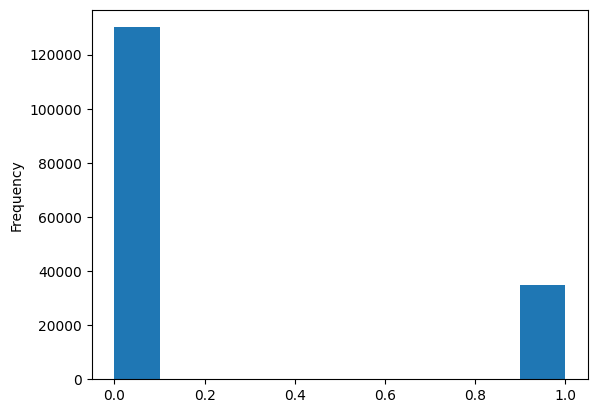

In [ ]:
customer_data.Exited.plot.hist()

In [ ]:
#number of people that Exited
(customer_data.Exited==1).sum()

34921

In [ ]:
#number of people that stays
(customer_data.Exited==0).sum()

130113

In [ ]:
customer_data_2 = customer_data.drop('Exited',axis=1)
customer_data_2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,1,1


<Axes: title={'center': 'Correlated With Exited Column'}>

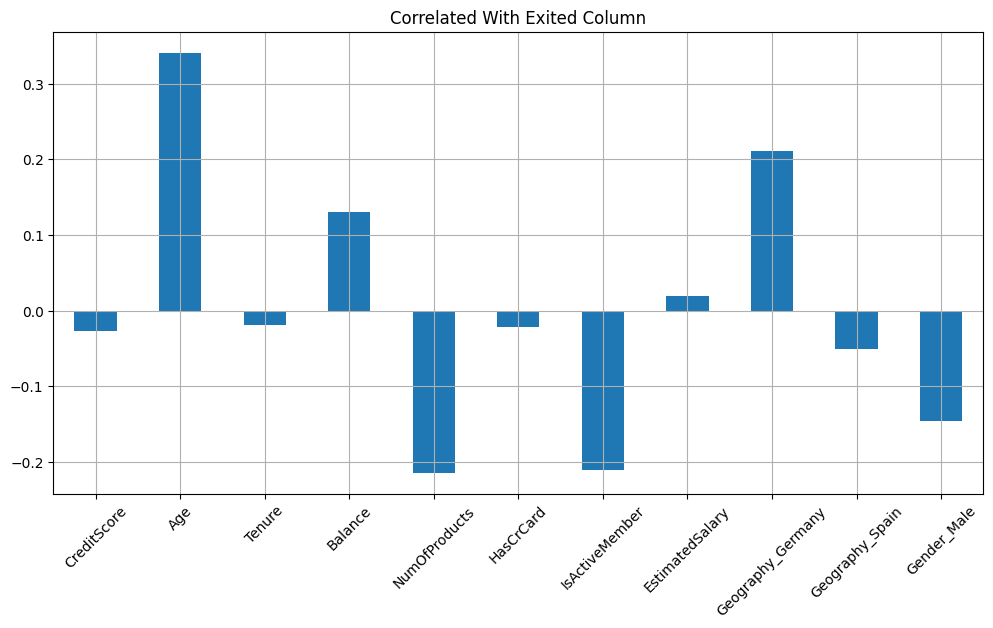

In [ ]:
customer_data_2.corrwith(customer_data['Exited']).plot.bar(figsize=(12,6),title='Correlated With Exited Column',rot=45,grid=True)

In [ ]:
corr=customer_data.corr()

<Axes: >

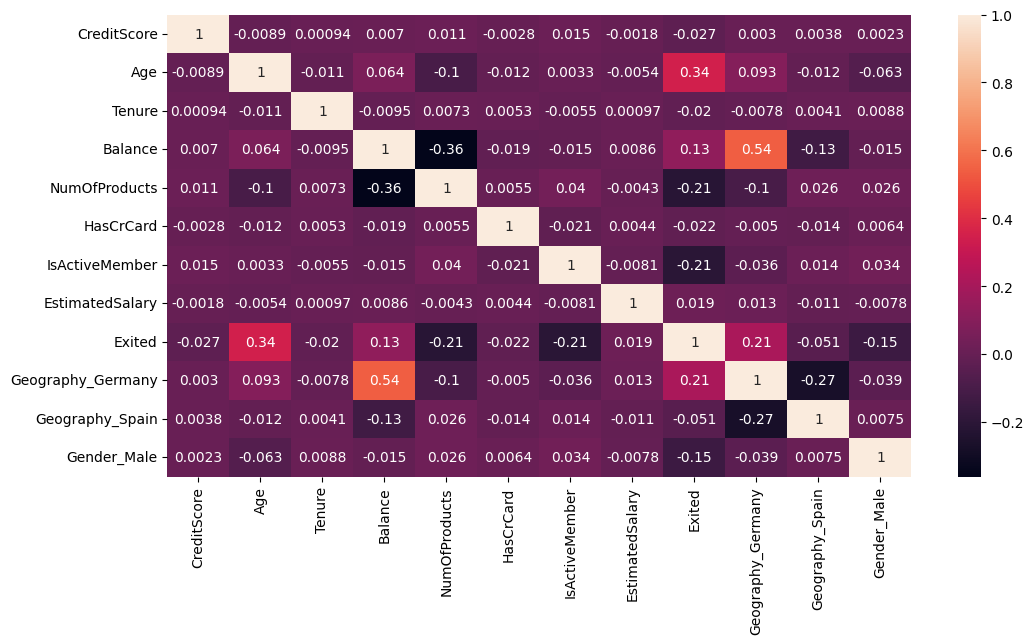

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

In [ ]:
x=customer_data.drop('Exited',axis=1)
y=customer_data['Exited']

Train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

# Define features
x = customer_data.drop(['Exited'], axis=1)

# Define target
y = customer_data['Exited']

# Split training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [ ]:
x_train.shape

(132027, 11)

In [ ]:
x_test.shape

(33007, 11)

Using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
x_train

array([[ 0.71662217, -0.80455465, -0.36431817, ..., -0.5151602 ,
        -0.5295383 ,  0.88035993],
       [ 0.64174536, -0.69178923,  1.77441865, ..., -0.5151602 ,
        -0.5295383 ,  0.88035993],
       [-1.04298285, -1.0300855 , -1.43368658, ..., -0.5151602 ,
        -0.5295383 ,  0.88035993],
       ...,
       [-1.57959998, -0.1279621 ,  1.41796252, ...,  1.94114374,
        -0.5295383 , -1.13589904],
       [ 0.85389632,  0.77416129, -1.07723044, ..., -0.5151602 ,
         1.88843753, -1.13589904],
       [-1.16777753, -1.0300855 ,  0.70505024, ..., -0.5151602 ,
        -0.5295383 , -1.13589904]])

**Using RandomForestClassifier To Train The Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [ ]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=5, max_depth=2)
rf.fit(x_train, y_train)


RandomForestClassifier(max_depth=2, n_estimators=5)

In [ ]:
# Get predicted class probabilities for the test set
y_pred_prob = rf.predict_proba(x_test)[:, 1]


In [ ]:
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)


In [ ]:
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc


0.8496126173858473

**Using AUC_ROC Metric To Evaluate The Model**

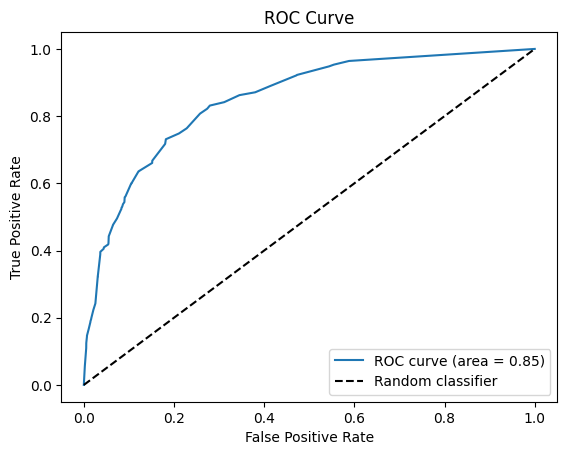

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


**Using LogisticRegression To Train The Model**

In [ ]:
#Train LogisticRegressionModelClassifier
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Generate predictions
y_pred_logistic = logistic_model.predict_proba(x_test)[:, 1]


In [ ]:
# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

In [ ]:
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc


0.8496126173858473

**Using AUC_ROC Metric To Evaluate The Model**

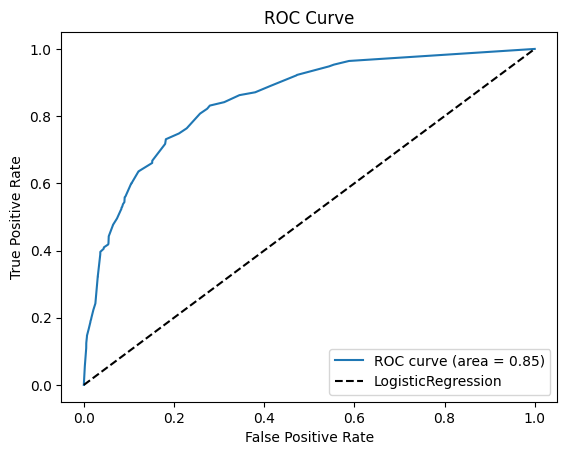

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr
plt.plot([0, 1], [0, 1], 'k--', label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()